In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sympy import Point,Line

In [2]:
%config IPCompleter.greedy=True
#%config NotebookApp.iopub_data_rate_limit=1.0e10

In [3]:
data = open('/home/shobhit/NewDataset/UCI HAR Dataset/train/X_train.txt')

In [4]:
lines = data.readlines()
len(lines)

7352

In [5]:
#lines[1]

In [6]:
new_lines=[]
for i,line in enumerate(lines):
    temp = line.strip('\n')
    temp = temp.strip('  ')
    temp = re.sub("\s+",",",temp.strip())
    a=[float(e) for e in temp.split(',')]
    new_lines.append(a)

In [7]:
z=np.array(new_lines)
z.shape

(7352, 561)

In [8]:
#pca = PCA(n_components=4)
#pca.fit(z)

In [9]:
#print(pca.explained_variance_ratio_)

In [10]:
#sample = pca.transform(z)
#sample[9]
scale=StandardScaler()
sample=scale.fit_transform(z)

**Elbow with Euclidean Distance**

In [24]:
distortion_euclidean=[]
slope=[]
K = range(2,11)
for k in K :
    kmeansModel = KMeans(n_clusters=k,init='k-means++')
    kmeansModel.fit_predict(sample)
    #Calculate pairwise distance between centers and each sample and then finding minnimum of that
    distortion_euclidean.append(sum(np.min(cdist(sample,kmeansModel.cluster_centers_,'euclidean'),axis=1)))
    #Calculate slope of each line
    if k>2:
        s= (distortion_euclidean[-1]-distortion_euclidean[-2])
        slope.append([k,s])

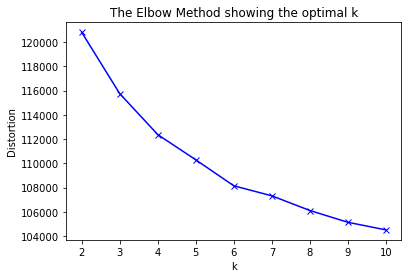

In [25]:
plt.plot(K,distortion_euclidean,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [26]:
slope

[[3, -5068.298484985353],
 [4, -3381.7773349748604],
 [5, -2086.103878435504],
 [6, -2145.376060307244],
 [7, -826.593800191753],
 [8, -1212.846596091782],
 [9, -972.9202930617466],
 [10, -627.6572691663314]]

In [27]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 4
Optimal Number of Clusters = 6


In [28]:
distances=[]
for i in range(0,9):
    p1=Point(2,distortion_euclidean[0])
    p2=Point(10,distortion_euclidean[8])
    l1 = Line(p1,p2)
    p=Point(i+2,distortion_euclidean[i])
    l2=l1.perpendicular_segment(p)
    distances.append(l2.length)
index=distances.index(np.max(distances))
print('Optimal number 0f clusters = '+str(index+2))

Optimal number 0f clusters = 6


In [16]:
kmeansModel_new = KMeans(n_clusters=6)
labels=kmeansModel_new.fit_predict(sample)

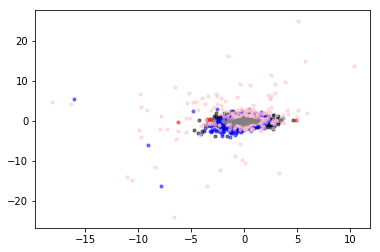

In [17]:
area = np.pi*3
plt.scatter(sample[labels==0,0],sample[labels==0,1],s=area,c='red',alpha=0.5)
plt.scatter(sample[labels==1,0],sample[labels==1,1],s=area,c='green',alpha=0.5)
plt.scatter(sample[labels==2,0],sample[labels==2,1],s=area,c='black',alpha=0.5)
plt.scatter(sample[labels==3,0],sample[labels==3,1],s=area,c='blue',alpha=0.5)
plt.scatter(sample[labels==4,0],sample[labels==4,1],s=area,c='pink',alpha=0.5)
plt.scatter(sample[labels==5,0],sample[labels==5,1],s=area,c='grey',alpha=0.5)
plt.show()

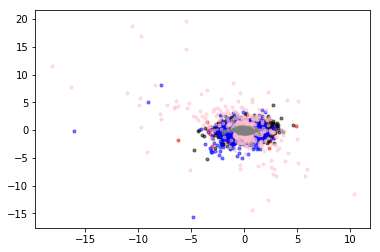

In [18]:
area = np.pi*3
plt.scatter(sample[labels==0,0],sample[labels==0,2],s=area,c='red',alpha=0.5)
plt.scatter(sample[labels==1,0],sample[labels==1,2],s=area,c='green',alpha=0.5)
plt.scatter(sample[labels==2,0],sample[labels==2,2],s=area,c='black',alpha=0.5)
plt.scatter(sample[labels==3,0],sample[labels==3,2],s=area,c='blue',alpha=0.5)
plt.scatter(sample[labels==4,0],sample[labels==4,2],s=area,c='pink',alpha=0.5)
plt.scatter(sample[labels==5,0],sample[labels==5,2],s=area,c='grey',alpha=0.5)
plt.show()

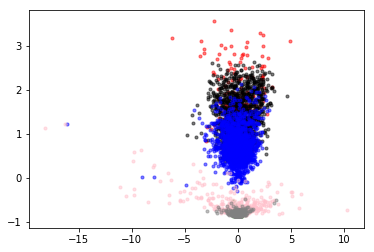

In [19]:
area = np.pi*3
plt.scatter(sample[labels==0,0],sample[labels==0,3],s=area,c='red',alpha=0.5)
plt.scatter(sample[labels==1,0],sample[labels==1,3],s=area,c='green',alpha=0.5)
plt.scatter(sample[labels==2,0],sample[labels==2,3],s=area,c='black',alpha=0.5)
plt.scatter(sample[labels==3,0],sample[labels==3,3],s=area,c='blue',alpha=0.5)
plt.scatter(sample[labels==4,0],sample[labels==4,3],s=area,c='pink',alpha=0.5)
plt.scatter(sample[labels==5,0],sample[labels==5,3],s=area,c='grey',alpha=0.5)
plt.show()

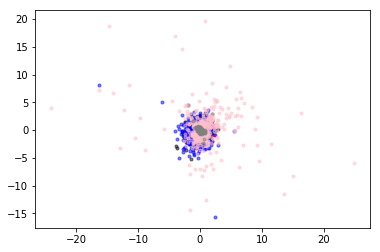

In [20]:
area = np.pi*3
plt.scatter(sample[labels==0,1],sample[labels==0,2],s=area,c='red',alpha=0.5)
plt.scatter(sample[labels==1,1],sample[labels==1,2],s=area,c='green',alpha=0.5)
plt.scatter(sample[labels==2,1],sample[labels==2,2],s=area,c='black',alpha=0.5)
plt.scatter(sample[labels==3,1],sample[labels==3,2],s=area,c='blue',alpha=0.5)
plt.scatter(sample[labels==4,1],sample[labels==4,2],s=area,c='pink',alpha=0.5)
plt.scatter(sample[labels==5,1],sample[labels==5,2],s=area,c='grey',alpha=0.5)
plt.show()

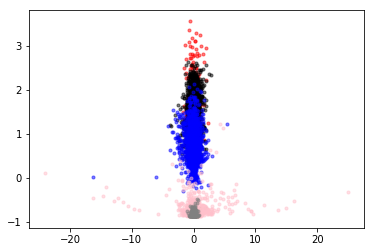

In [21]:
area = np.pi*3
plt.scatter(sample[labels==0,1],sample[labels==0,3],s=area,c='red',alpha=0.5)
plt.scatter(sample[labels==1,1],sample[labels==1,3],s=area,c='green',alpha=0.5)
plt.scatter(sample[labels==2,1],sample[labels==2,3],s=area,c='black',alpha=0.5)
plt.scatter(sample[labels==3,1],sample[labels==3,3],s=area,c='blue',alpha=0.5)
plt.scatter(sample[labels==4,1],sample[labels==4,3],s=area,c='pink',alpha=0.5)
plt.scatter(sample[labels==5,1],sample[labels==5,3],s=area,c='grey',alpha=0.5)
plt.show()

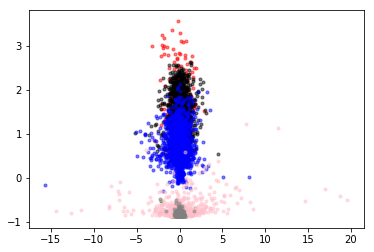

In [22]:
area = np.pi*3
plt.scatter(sample[labels==0,2],sample[labels==0,3],s=area,c='red',alpha=0.5)
plt.scatter(sample[labels==1,2],sample[labels==1,3],s=area,c='green',alpha=0.5)
plt.scatter(sample[labels==2,2],sample[labels==2,3],s=area,c='black',alpha=0.5)
plt.scatter(sample[labels==3,2],sample[labels==3,3],s=area,c='blue',alpha=0.5)
plt.scatter(sample[labels==4,2],sample[labels==4,3],s=area,c='pink',alpha=0.5)
plt.scatter(sample[labels==5,2],sample[labels==5,3],s=area,c='grey',alpha=0.5)
plt.show()